# 第8章 文本数据分析

## 8.1 文本数据分析工具

### 8.1.2 安装nltk和下载语料库

In [1]:
import nltk
nltk.download()    # 打开NLTK下载器

showing info https://raw.githubusercontent.com/nltk/nltk_data/gh-pages/index.xml


True

In [2]:
from nltk.corpus import brown       # 导入brown语料库
brown.words()                        # 查看brown库中所有的单词

['The', 'Fulton', 'County', 'Grand', 'Jury', 'said', ...]

In [3]:
brown.categories()

['adventure',
 'belles_lettres',
 'editorial',
 'fiction',
 'government',
 'hobbies',
 'humor',
 'learned',
 'lore',
 'mystery',
 'news',
 'religion',
 'reviews',
 'romance',
 'science_fiction']

In [4]:
'brown中一共有{}个句子'.format(len(brown.sents()))

'brown中一共有57340个句子'

In [5]:
'brown中一共有{}个单词'.format(len(brown.words()))

'brown中一共有1161192个单词'

## 8.2 文本预处理

### 8.2.2 分词（包含中英文）

In [6]:
# 原始英文文本
sentence = 'Python is a structured and powerful object-oriented programming language.'
# 将句子切分为单词
words = nltk.word_tokenize(sentence)
words

['Python',
 'is',
 'a',
 'structured',
 'and',
 'powerful',
 'object-oriented',
 'programming',
 'language',
 '.']

In [7]:
import jieba
# 原始中文文本
sentence = '传智专修学院推出颠覆式办学模式'
# 全模式划分中文句子
terms_list = jieba.cut(sentence, cut_all=True)
print('【全模式】：'+ '/'.join(terms_list))
# 精确模式划分中文句子
terms_list = jieba.cut(sentence, cut_all=False)
print('【精确模式】：'+ '/'.join(terms_list))

Building prefix dict from the default dictionary ...
Loading model from cache C:\WINDOWS\Temp\jieba.cache
Loading model cost 0.780 seconds.
Prefix dict has been built succesfully.


【全模式】：传/智/专修/修学/学院/推出/颠覆/式/办学/模式
【精确模式】：传智/专修/学院/推出/颠覆/式/办学/模式


### 8.2.3 词性标注

In [8]:
words = nltk.word_tokenize('Python is a structured and powerful object-oriented programming language.')
# 为列表中的每个单词标注词性
nltk.pos_tag(words)

[('Python', 'NNP'),
 ('is', 'VBZ'),
 ('a', 'DT'),
 ('structured', 'JJ'),
 ('and', 'CC'),
 ('powerful', 'JJ'),
 ('object-oriented', 'JJ'),
 ('programming', 'NN'),
 ('language', 'NN'),
 ('.', '.')]

### 8.2.4 词形归一化

In [9]:
# 导入nltk.stem模块的波特词干提取器
from nltk.stem.porter import PorterStemmer
# 按照波特算法提取词干
porter_stem = PorterStemmer()
porter_stem.stem('watched')

'watch'

In [10]:
porter_stem.stem('watching')

'watch'

In [11]:
from nltk.stem.lancaster import LancasterStemmer
lancaster_stem = LancasterStemmer()
# 按照兰卡斯特算法提取词干
lancaster_stem.stem('jumped')

'jump'

In [12]:
lancaster_stem.stem('jumping')

'jump'

In [13]:
from nltk.stem import SnowballStemmer
snowball_stem = SnowballStemmer('english')
snowball_stem.stem('listened')

'listen'

In [14]:
snowball_stem.stem('listening')

'listen'

In [15]:
from nltk.stem import WordNetLemmatizer
# 创建WordNetLemmatizer对象
wordnet_lem = WordNetLemmatizer()
# 还原books单词的基本形式
wordnet_lem.lemmatize('books')

'book'

In [16]:
wordnet_lem.lemmatize('went')

'went'

In [17]:
wordnet_lem.lemmatize('did')

'did'

In [18]:
# 指定went的词性为动词
wordnet_lem.lemmatize('went', pos='v')

'go'

In [19]:
wordnet_lem.lemmatize('did', pos='v')

'do'

### 8.2.5 删除停用词

In [20]:
from nltk.corpus import stopwords
# 原始文本
sentence = 'Python is a structured and powerful object-oriented programming language.'
# 将英文语句按空格划分为多个单词
words = nltk.word_tokenize(sentence)
words

['Python',
 'is',
 'a',
 'structured',
 'and',
 'powerful',
 'object-oriented',
 'programming',
 'language',
 '.']

In [22]:
# 获取英文停用词列表
stop_words = stopwords.words('english')
# 定义一个空列表
remain_words = []
# 如果发现单词不包含在停用词列表中，就保存在remain_words中
for word in words:
    if word not in stop_words:
        remain_words.append(word)
remain_words

['Python',
 'structured',
 'powerful',
 'object-oriented',
 'programming',
 'language',
 '.']

## 8.3 文本情感分析

In [23]:
# 用作训练的文本
text_one = 'This is a wonderful book'
text_two = 'I like reading this book very much.'
text_thr = 'This book reads well.'
text_fou = 'This book is not good.'
text_fiv = 'This is a very bad book.'

In [24]:
import nltk
from nltk.stem import WordNetLemmatizer
from nltk.corpus import stopwords
from nltk.classify import NaiveBayesClassifier
def pret_text(text):
    # 对文本进行分词
    words = nltk.word_tokenize(text)
    # 词形还原
    wordnet_lematizer = WordNetLemmatizer()    
    words = [wordnet_lematizer.lemmatize(word) for word in words]
    # 删除停用词
    remain_words = [word for word in words if word not 
                    in stopwords.words('english')]
    # True 表示该词在文本中
    return {word: True for word in remain_words}

In [25]:
# 构建训练文本，设定情感分值
train_data = [[pret_text(text_one), 1],
              [pret_text(text_two), 1],
              [pret_text(text_thr), 1],
              [pret_text(text_fou), -1],
              [pret_text(text_fiv), -1]]
# 训练模型
demo_model = NaiveBayesClassifier.train(train_data)

In [26]:
# 测试模型
test_text1 = 'I like this movie very much'
demo_model.classify(pret_text(test_text1))

1

In [27]:
test_text2 = 'The film is very bad'
demo_model.classify(pret_text(test_text2))

-1

In [28]:
test_text3 = 'The film is terrible'
demo_model.classify(pret_text(test_text3))

1

## 8.4 文本相似度

In [29]:
import nltk
from nltk import FreqDist
text1 = 'John likes to watch movies'
text2 = 'John also likes to watch football games'
all_text = text1 +" " + text2
# 分词
words = nltk.word_tokenize(all_text)
# 创建FreqDist对象，记录每个单词出现的频率
freq_dist = FreqDist(words)
freq_dist

FreqDist({'John': 2, 'likes': 2, 'to': 2, 'watch': 2, 'movies': 1, 'also': 1, 'football': 1, 'games': 1})

In [30]:
freq_dist['John']

2

In [31]:
# 取出n个常用的单词
n = 5
# 返回常用单词列表
most_common_words = freq_dist.most_common(n)
most_common_words

[('John', 2), ('likes', 2), ('to', 2), ('watch', 2), ('movies', 1)]

In [32]:
def find_position(common_words):
    """
    查找常用单词的位置
    """
    result = {}
    pos = 0
    for word in common_words:
        result[word[0]] = pos
        pos += 1
    return result
# 记录常用单词的位置
pos_dict = find_position(most_common_words)
pos_dict

{'John': 0, 'likes': 1, 'to': 2, 'watch': 3, 'movies': 4}

In [33]:
def text_to_vector(words):
    '''
       将文本转换为词频向量
    '''
    # 初始化向量
    freq_vec = [0] * n
    # 在“常用单词列表”上计算词频
    for word in words:
       if word in list(pos_dict.keys()):
           freq_vec[pos_dict[word]] += 1
    return freq_vec

In [34]:
# 词频向量
vector1 = text_to_vector(nltk.word_tokenize(text1))
vector1

[1, 1, 1, 1, 1]

In [35]:
vector2 = text_to_vector(nltk.word_tokenize(text2))
vector2

[1, 1, 1, 1, 0]

In [36]:
from nltk.cluster.util import cosine_distance
cosine_distance(vector1, vector2)

0.10557280900008414

## 8.5 文本分类

In [37]:
import nltk
from nltk.corpus import names
import random
# 收集数据，用一部分数据来训练，用一部分数据用来测试
names = [(name,'male') for name in names.words('male.txt')] + [(name,'female') for name in names.words('female.txt')]
# 将names的所有元素随机排序
random.shuffle(names)
names

[('Thea', 'female'),
 ('Barnett', 'male'),
 ('Meggan', 'female'),
 ('Mel', 'male'),
 ('Bekki', 'female'),
 ('Xymenes', 'male'),
 ('Janeva', 'female'),
 ('Willem', 'male'),
 ('Shir', 'female'),
 ('Anurag', 'male'),
 ('Winnie', 'male'),
 ('Zora', 'female'),
 ('Devondra', 'female'),
 ('Powell', 'male'),
 ('Daffie', 'female'),
 ('Bobette', 'female'),
 ('Rosario', 'female'),
 ('Abdulkarim', 'male'),
 ('Alena', 'female'),
 ('Claudio', 'male'),
 ('Joann', 'female'),
 ('Caressa', 'female'),
 ('Rob', 'male'),
 ('Eulalie', 'female'),
 ('Welsh', 'male'),
 ('Erik', 'male'),
 ('Deeanne', 'female'),
 ('Barton', 'male'),
 ('Tina', 'female'),
 ('Maible', 'female'),
 ('Flossie', 'female'),
 ('Davidde', 'male'),
 ('Allison', 'female'),
 ('Siana', 'female'),
 ('Marleen', 'female'),
 ('Aila', 'female'),
 ('Ashley', 'female'),
 ('Ros', 'female'),
 ('Rochell', 'female'),
 ('Wandie', 'female'),
 ('Dana', 'male'),
 ('Bengt', 'male'),
 ('Molly', 'female'),
 ('Roscoe', 'male'),
 ('Elfrida', 'female'),
 ('Gypsy'

In [38]:
# 特征提取器
def gender_features(word): 
    # 特征就是最后一个字母和倒数第二个字母
    return {'最后一个字母':word[-1],'倒数第二个字母':word[-2]}
features = [(gender_features(n),g) for (n,g) in names]
features

[({'最后一个字母': 'a', '倒数第二个字母': 'e'}, 'female'),
 ({'最后一个字母': 't', '倒数第二个字母': 't'}, 'male'),
 ({'最后一个字母': 'n', '倒数第二个字母': 'a'}, 'female'),
 ({'最后一个字母': 'l', '倒数第二个字母': 'e'}, 'male'),
 ({'最后一个字母': 'i', '倒数第二个字母': 'k'}, 'female'),
 ({'最后一个字母': 's', '倒数第二个字母': 'e'}, 'male'),
 ({'最后一个字母': 'a', '倒数第二个字母': 'v'}, 'female'),
 ({'最后一个字母': 'm', '倒数第二个字母': 'e'}, 'male'),
 ({'最后一个字母': 'r', '倒数第二个字母': 'i'}, 'female'),
 ({'最后一个字母': 'g', '倒数第二个字母': 'a'}, 'male'),
 ({'最后一个字母': 'e', '倒数第二个字母': 'i'}, 'male'),
 ({'最后一个字母': 'a', '倒数第二个字母': 'r'}, 'female'),
 ({'最后一个字母': 'a', '倒数第二个字母': 'r'}, 'female'),
 ({'最后一个字母': 'l', '倒数第二个字母': 'l'}, 'male'),
 ({'最后一个字母': 'e', '倒数第二个字母': 'i'}, 'female'),
 ({'最后一个字母': 'e', '倒数第二个字母': 't'}, 'female'),
 ({'最后一个字母': 'o', '倒数第二个字母': 'i'}, 'female'),
 ({'最后一个字母': 'm', '倒数第二个字母': 'i'}, 'male'),
 ({'最后一个字母': 'a', '倒数第二个字母': 'n'}, 'female'),
 ({'最后一个字母': 'o', '倒数第二个字母': 'i'}, 'male'),
 ({'最后一个字母': 'n', '倒数第二个字母': 'n'}, 'female'),
 ({'最后一个字母': 'a', '倒数第二个字母': 's'}, 'female'),
 ({'最后

In [39]:
train, test = features[500:],features[:500] 
# 使用训练集训练模型
classifier = nltk.NaiveBayesClassifier.train(train) 

In [41]:
# 通过测试集来估计分类器的准确性
nltk.classify.accuracy(classifier, test)

0.778

In [43]:
# 如果一个人的名字是‘Ella，那么这个人是男还是女
classifier.classify({'last_letter': 'Ella'})

'female'

In [44]:
# 检查分类器，找出最能够区分名字性别的特征值
classifier.show_most_informative_features(5)

Most Informative Features
                  最后一个字母 = 'a'            female : male   =     37.1 : 1.0
                  最后一个字母 = 'k'              male : female =     30.6 : 1.0
                  最后一个字母 = 'f'              male : female =     17.2 : 1.0
                  最后一个字母 = 'p'              male : female =     11.8 : 1.0
                  最后一个字母 = 'v'              male : female =     10.5 : 1.0


## 8.6 案例—商品评价信息分析

In [45]:
import pandas as pd
from nltk import FreqDist
import jieba
file_path = open(r'C:\Users\admin\Desktop\商品评价信息.csv')
file_data = pd.read_csv(file_path)
file_data

,评价信息
0,穿上挺舒服的，是我有史以来在网上买的最漂亮最舒服的一件衣服了，面料也挺不错的，建议大家喜欢就...
1,衣服上身很舒服、布料也好、就是裤子不是很大，如果裤子能改进点就完美了;
2,给男盆友买了一套，很好哦。我很喜欢，晒图给大家做一个参考，穿的很帅气，我很满意，图案很个性，...
3,质量很好。就是码子偏大。老公体重180身高175穿3XL的有点大。要是喜欢穿贴身的建议买小一...
4,"在淘宝_上买东西了,棒棒棒好厉害好东西便宜而且质量好，物美价廉买的放心用的开心，感觉都买.上..."
5,衣服穿着合身，不过材质粗糙，手洗掉色严重，而且洗的时候会掉很多线头，担心会褪色，做工方面不错...
6,衣服摸着很柔软，穿在身上很舒服，质量很好，卖家耐心解答，仔细确认，服务态度非常好，全五分支持
7,"质量挺好的，希望优惠点!!!淘宝几年才知道原来评论85个字才会有积分。所以从今天到以后,这段..."
8,买了2套卫衣，感觉姜黄色的女朋友穿着也挺合适的，就跟她也买了一套。物流很快，第二天就收到宝贝...
9,这是一个好评模板，不用看了，下面都是废话。因为本仙女很懒，买的宝贝太多，不想每个宝贝都写评论...


In [46]:
# 删除重复的评价
file_data = file_data.drop_duplicates()
file_data

,评价信息
0,穿上挺舒服的，是我有史以来在网上买的最漂亮最舒服的一件衣服了，面料也挺不错的，建议大家喜欢就...
1,衣服上身很舒服、布料也好、就是裤子不是很大，如果裤子能改进点就完美了;
2,给男盆友买了一套，很好哦。我很喜欢，晒图给大家做一个参考，穿的很帅气，我很满意，图案很个性，...
3,质量很好。就是码子偏大。老公体重180身高175穿3XL的有点大。要是喜欢穿贴身的建议买小一...
4,"在淘宝_上买东西了,棒棒棒好厉害好东西便宜而且质量好，物美价廉买的放心用的开心，感觉都买.上..."
5,衣服穿着合身，不过材质粗糙，手洗掉色严重，而且洗的时候会掉很多线头，担心会褪色，做工方面不错...
6,衣服摸着很柔软，穿在身上很舒服，质量很好，卖家耐心解答，仔细确认，服务态度非常好，全五分支持
7,"质量挺好的，希望优惠点!!!淘宝几年才知道原来评论85个字才会有积分。所以从今天到以后,这段..."
8,买了2套卫衣，感觉姜黄色的女朋友穿着也挺合适的，就跟她也买了一套。物流很快，第二天就收到宝贝...
9,这是一个好评模板，不用看了，下面都是废话。因为本仙女很懒，买的宝贝太多，不想每个宝贝都写评论...


In [48]:
# 使用精确模式划分中文句子
cut_words = jieba.lcut(str(file_data['评价信息'].values), cut_all = False)
cut_words

['[',
 "'",
 '穿',
 '上',
 '挺舒服',
 '的',
 '，',
 '是',
 '我',
 '有史以来',
 '在',
 '网上',
 '买',
 '的',
 '最',
 '漂亮',
 '最舒服',
 '的',
 '一件',
 '衣服',
 '了',
 '，',
 '面料',
 '也',
 '挺不错',
 '的',
 '，',
 '建议',
 '大家',
 '喜欢',
 '就',
 '立即',
 '购买',
 '吧',
 '?',
 '?',
 "'",
 '\n',
 ' ',
 "'",
 '衣服',
 '上身',
 '很',
 '舒服',
 '、',
 '布料',
 '也好',
 '、',
 '就是',
 '裤子',
 '不是',
 '很大',
 '，',
 '如果',
 '裤子',
 '能',
 '改进',
 '点',
 '就',
 '完美',
 '了',
 ';',
 "'",
 '\n',
 ' ',
 "'",
 '给',
 '男盆友',
 '买',
 '了',
 '一套',
 '，',
 '很',
 '好',
 '哦',
 '。',
 '我',
 '很',
 '喜欢',
 '，',
 '晒图',
 '给',
 '大家',
 '做',
 '一个',
 '参考',
 '，',
 '穿',
 '的',
 '很',
 '帅气',
 '，',
 '我',
 '很',
 '满意',
 '，',
 '图案',
 '很',
 '个性',
 '，',
 '比较',
 '符合',
 '他',
 '傻大个',
 '的',
 '气质',
 ' ',
 '哈哈哈哈',
 '，',
 '感觉',
 '物美价廉',
 '，',
 '棒棒',
 '哒',
 '，',
 '衣服',
 '穿着',
 '很',
 '舒适',
 '，',
 '也',
 '不',
 '掉色',
 '，',
 '不会',
 '闷',
 '着',
 '，',
 '质量',
 '果然',
 '不错',
 '，',
 '很',
 '适合',
 '运动',
 '的',
 '时候',
 '穿',
 '，',
 '男朋友',
 '简直',
 '很',
 '开心',
 '，',
 '还会来',
 '回购',
 '的',
 '，',
 '一件',
 '是',
 '不够',
 '的',
 "'",
 '\

In [49]:
# 加载停用词表
file_path = open(r'C:\Users\admin\Desktop\停用词表.txt',encoding='utf-8')
stop_words = file_path.read()
# 删除停用词
# 新建一个空列表，用于存储删除停用词后的数据
new_data = []
for word in cut_words:
    if word not in stop_words:
        new_data.append(word)
new_data

['挺舒服',
 '有史以来',
 '网上',
 '买',
 '漂亮',
 '最舒服',
 '衣服',
 '面料',
 '挺不错',
 '建议',
 '喜欢',
 '立即',
 '购买',
 '衣服',
 '上身',
 '舒服',
 '布料',
 '裤子',
 '很大',
 '裤子',
 '改进',
 '完美',
 '男盆友',
 '买',
 '喜欢',
 '晒图',
 '做',
 '参考',
 '帅气',
 '满意',
 '图案',
 '个性',
 '比较',
 '符合',
 '气质',
 '感觉',
 '物美价廉',
 '棒棒',
 '衣服',
 '穿着',
 '舒适',
 '掉色',
 '不会',
 '闷',
 '质量',
 '不错',
 '适合',
 '运动',
 '男朋友',
 '简直',
 '开心',
 '还会来',
 '回购',
 '不够',
 '差',
 '大小',
 '合适',
 '摸',
 '比较',
 '薄',
 '送']

In [50]:
# 词频统计
freq_list = FreqDist(new_data)
# 返回词语列表
most_common_words = freq_list.most_common()
most_common_words

[('衣服', 3),
 ('买', 2),
 ('喜欢', 2),
 ('裤子', 2),
 ('比较', 2),
 ('挺舒服', 1),
 ('有史以来', 1),
 ('网上', 1),
 ('漂亮', 1),
 ('最舒服', 1),
 ('面料', 1),
 ('挺不错', 1),
 ('建议', 1),
 ('立即', 1),
 ('购买', 1),
 ('上身', 1),
 ('舒服', 1),
 ('布料', 1),
 ('很大', 1),
 ('改进', 1),
 ('完美', 1),
 ('男盆友', 1),
 ('晒图', 1),
 ('做', 1),
 ('参考', 1),
 ('帅气', 1),
 ('满意', 1),
 ('图案', 1),
 ('个性', 1),
 ('符合', 1),
 ('气质', 1),
 ('感觉', 1),
 ('物美价廉', 1),
 ('棒棒', 1),
 ('穿着', 1),
 ('舒适', 1),
 ('掉色', 1),
 ('不会', 1),
 ('闷', 1),
 ('质量', 1),
 ('不错', 1),
 ('适合', 1),
 ('运动', 1),
 ('男朋友', 1),
 ('简直', 1),
 ('开心', 1),
 ('还会来', 1),
 ('回购', 1),
 ('不够', 1),
 ('差', 1),
 ('大小', 1),
 ('合适', 1),
 ('摸', 1),
 ('薄', 1),
 ('送', 1)]

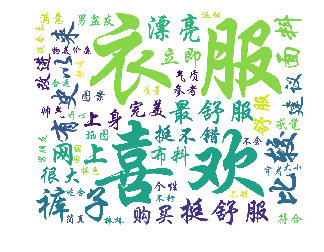

In [52]:
# 导入所需要使用的包
from matplotlib import pyplot as plt
from wordcloud import WordCloud 
# 词云显示
font = r'C:\Windows\Fonts\STXINGKA.TTF'  # 华文行楷
wc = WordCloud(font_path = font, background_color = 'white',
               width = 1000, height = 800).generate(" ".join(new_data))
plt.imshow(wc)   # 用plt显示图片
plt.axis('off')  # 不显示坐标轴
plt.show()        # 显示图片